## We are going to use UCI data repoistory. It contains the bank marketing data set that contains campaign information of how many customers acutally subscribe to term deposit.

In [36]:
# Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests, zipfile, io

In [37]:
# Download the main ZIP file
url = "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"
r = requests.get(url)

# Unzip the first layer
with zipfile.ZipFile(io.BytesIO(r.content)) as main_zip:
    # Extract 'bank.zip' (the main dataset)
    with main_zip.open('bank.zip') as bank_zip_file:
        with zipfile.ZipFile(bank_zip_file) as bank_zip:
            # Read the 'bank-full.csv' file into a pandas DataFrame
            with bank_zip.open('bank-full.csv') as f:
                bank = pd.read_csv(f, sep=';')

# Preview the dataset
print(bank.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [38]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [39]:
# Check how many null values in the data set
bank.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [40]:
# Find count distinct values in the data set
for column in bank.columns:
    print(column, " distinct values :", bank[column].value_counts())

age  distinct values : age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
95       2
93       2
92       2
88       2
94       1
Name: count, Length: 77, dtype: int64
job  distinct values : job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
marital  distinct values : marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
education  distinct values : education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
default  distinct values : default
no     44396
yes      815
Name: count, dtype: int64
balance  distinct values : balance
0        3514
1         195
2         156
4         139
3         134
         ... 
14204       1
8205        1
9710   

In [41]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


##Exploratory Data Analysis


In [42]:
# Let's check value of Target Variables
bank['y'].value_counts(normalize=True, dropna=False)


,proportion
y,
no,0.883015
yes,0.116985


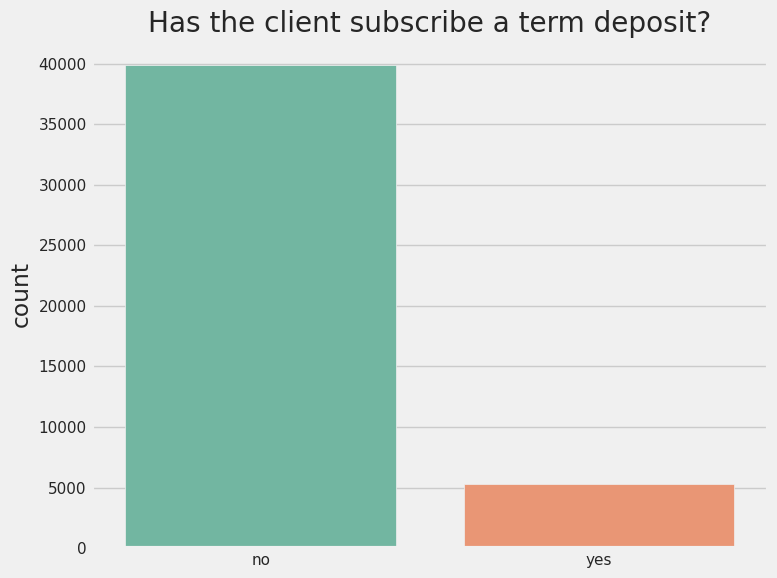

In [43]:
# Plot the target variable to show how unbalanced the output variable is
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 6))
sns.countplot(x='y',data=bank,palette='Set2')
plt.xlabel('')
plt.title('Has the client subscribe a term deposit?')
plt.tight_layout()
plt.show()

<Figure size 1000x1200 with 0 Axes>

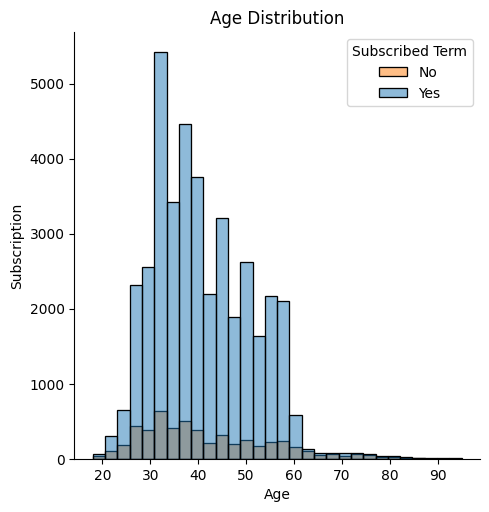

In [44]:
# Let's look at the age distribution as to which age group subscribed to it
plt.figure(figsize=(10,12))
plt.style.use('default')
sns.displot(data=bank, x='age', hue='y', bins=30, kde=False, legend=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Subscription')

plt.legend(title='Subscribed Term',loc='upper right',labels=['No','Yes'])
plt.show()

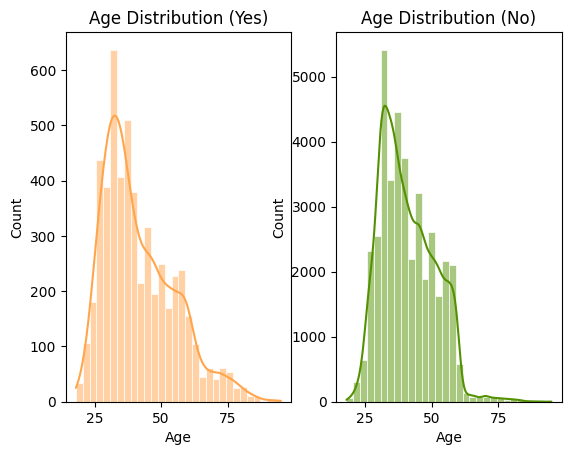

In [45]:
# Call histplot on each axis
# You need to pull up 2 variables otherwise the plots won't come out good
fig, axes = plt.subplots(1,2)
plt.style.use('default')

# define figure size
sns.set(rc={"figure.figsize":(8,4)})

# sns.histplot(bank.where(bank['y'] == 'yes'), bins=30, kde=True, ax=axes[0], color='#ffa54c')
# sns.histplot(bank.where(bank['y'] == 'no'), bins=30, kde=True, ax=axes[1], color='#539100')

sns.histplot(bank.loc[bank['y'] == 'yes']['age'], bins=30, kde=True, ax=axes[0], color='#ffa54c')
sns.histplot(bank.loc[bank['y'] == 'no']['age'], bins=30, kde=True, ax=axes[1], color='#539100')

axes[0].set_xlabel("Age", fontsize=10)
axes[0].set_title('Age Distribution (Yes)')

axes[1].set_xlabel("Age", fontsize=10)
axes[1].set_title('Age Distribution (No)')

plt.show()

# The age distribution between the charts is very similar
# let's draw a box plot to understand the age where it says Yes

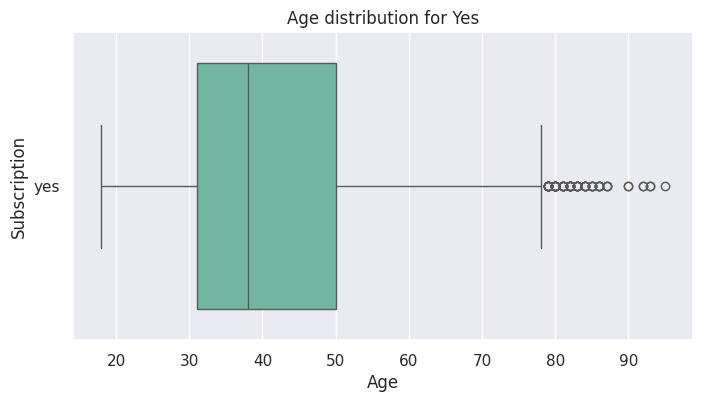

In [46]:
# Draw box plot for the data where the customer says yes

yes_data = bank.loc[bank['y'] == 'yes']

sns.boxplot(x='age', y='y', palette='Set2', data=yes_data)
plt.title('Age distribution for Yes')
plt.xlabel('Age')
plt.ylabel('Subscription')
plt.show()

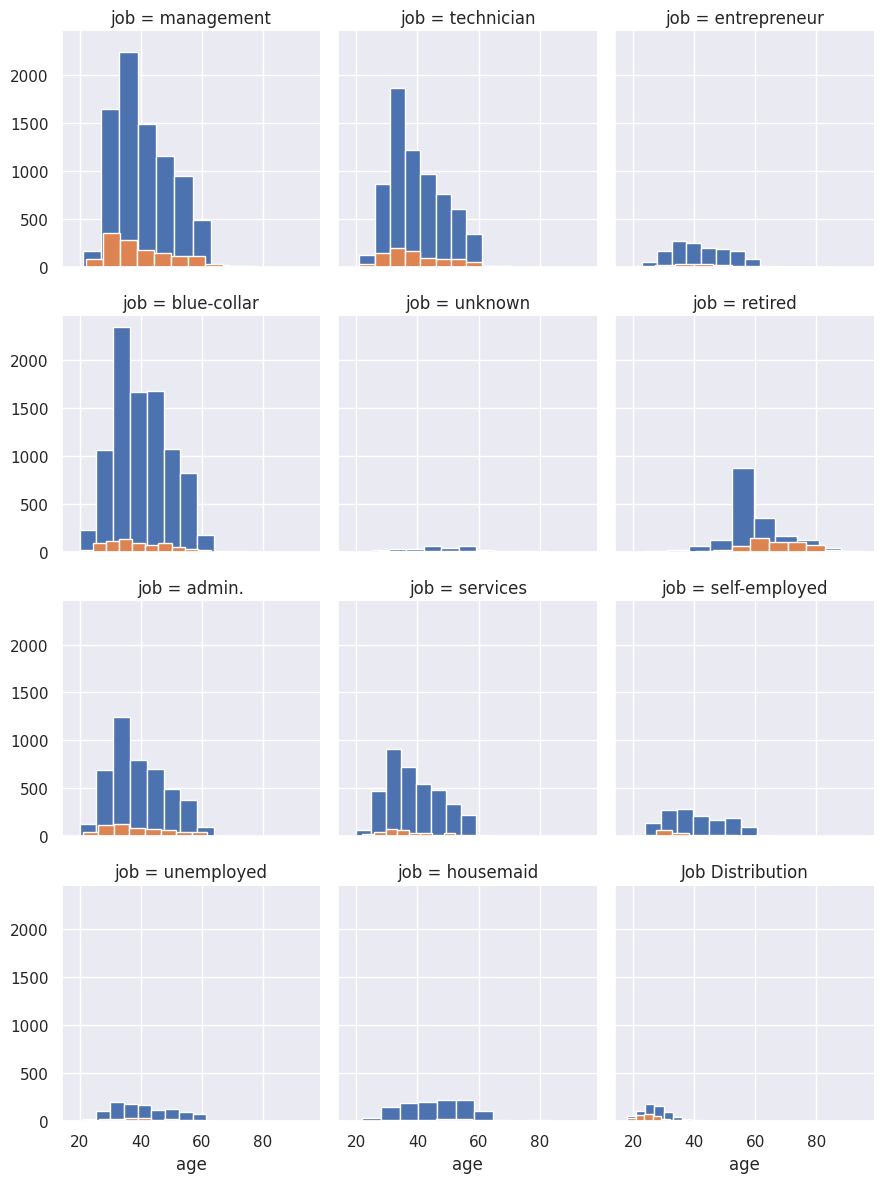

In [47]:
# Create wrapped small multiple chart
grid_layout = sns.FacetGrid(bank, col='job',hue='y', col_wrap=3)
grid_layout.map(plt.hist, 'age')
plt.title('Job Distribution')
plt.show()

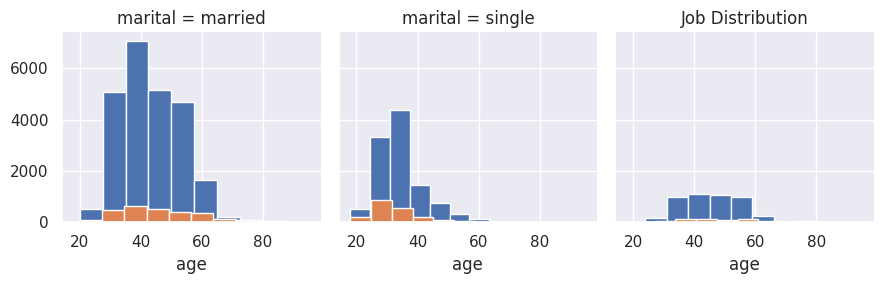

In [48]:
# Create wrapped small multiple chart
grid_layout = sns.FacetGrid(bank, col='marital',hue='y', col_wrap=3)
grid_layout.map(plt.hist, 'age')
plt.title('Job Distribution')
plt.show()

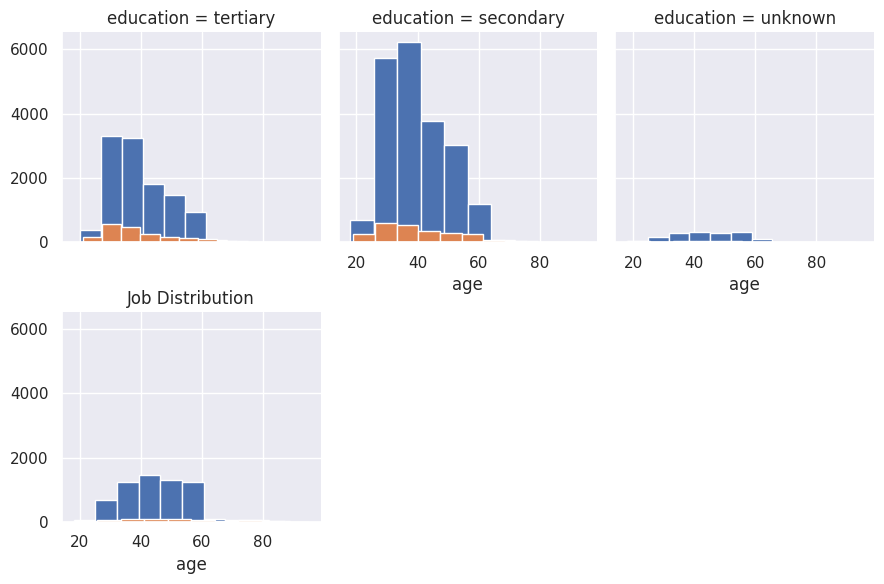

In [49]:
# Create wrapped small multiple chart
grid_layout = sns.FacetGrid(bank, col='education',hue='y', col_wrap=3)
grid_layout.map(plt.hist, 'age')
plt.title('Job Distribution')
plt.show()

In [50]:
bank.head(100)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,management,married,tertiary,no,101,yes,yes,unknown,5,may,426,1,-1,0,unknown,no
96,55,blue-collar,married,secondary,no,383,no,no,unknown,5,may,287,1,-1,0,unknown,no
97,60,retired,married,tertiary,no,81,yes,no,unknown,5,may,101,1,-1,0,unknown,no
98,39,technician,married,secondary,no,0,yes,no,unknown,5,may,203,1,-1,0,unknown,no


In [51]:
bank['education'].value_counts()

,count
education,
secondary,23202
tertiary,13301
primary,6851
unknown,1857


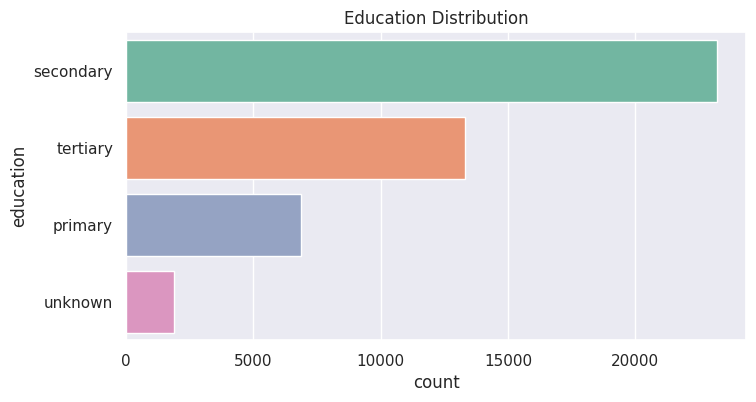

In [52]:
# Create countpllot for education
sns.countplot(data=bank, y='education', palette='Set2',order=bank['education'].value_counts().index)
plt.title("Education Distribution")
plt.show()

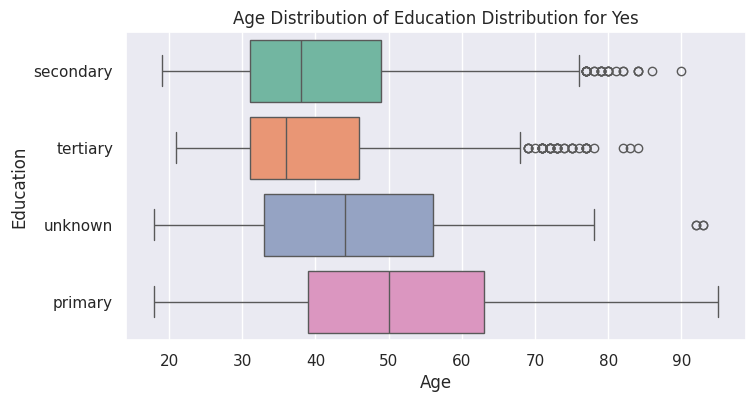

In [53]:
# Let's create box plot for education
yes_data = bank.loc[bank['y'] == 'yes']

sns.boxplot(y='education', x='age', data=yes_data, orient='h',palette='Set2')
plt.title('Age Distribution of Education Distribution for Yes')
plt.xlabel('Age')
plt.ylabel('Education')
plt.show()

# This box shows that people with more education has bank deposit in younger age

In [54]:
yes_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


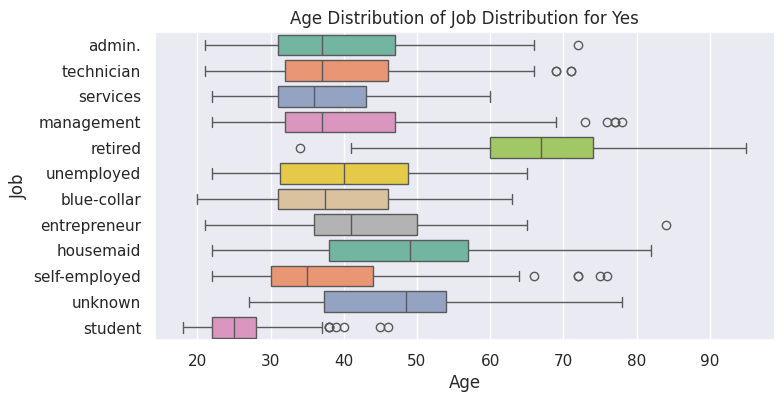

In [55]:
# Let's look at the occupation of the people who said yes
sns.boxplot(y='job', x='age', data=yes_data, orient='h',palette='Set2')
plt.title('Age Distribution of Job Distribution for Yes')
plt.xlabel('Age')
plt.ylabel('Job')
plt.show()


# From this diagram it is not clear which occupation has subscribed to loan amount in bank. Let's look at the same data differently


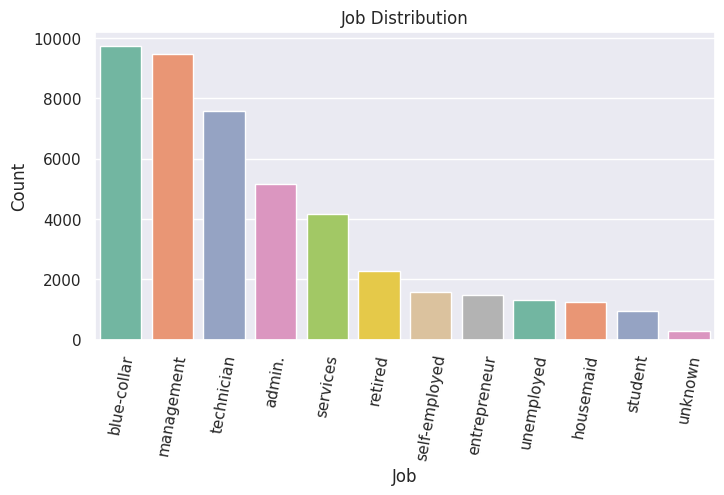

In [56]:
# Let's create countplot
ax = sns.countplot(data=bank, x='job', order=bank['job'].value_counts().index, palette='Set2')
plt.title("Job Distribution")
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

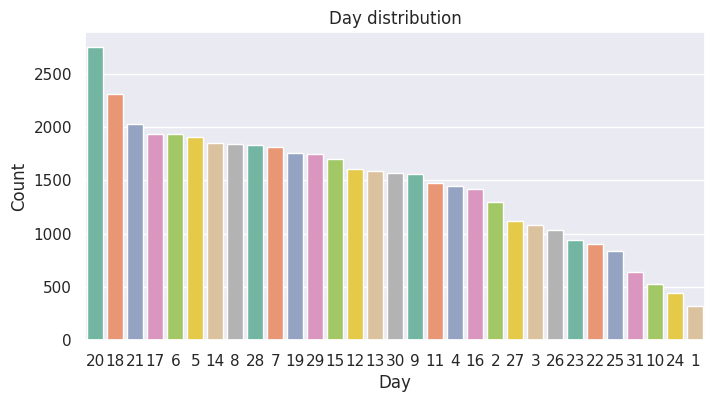

In [57]:
# Let's check how important is day
sns.countplot(data=bank, x='day', palette='Set2', order=bank['day'].value_counts().index)
plt.title("Day distribution")
plt.xlabel('Day')
plt.ylabel('Count')
#plt.xticks(rotation=90)
plt.show()

##Feature Engineering Selection


In [58]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [59]:
# Find numerical columns
numerics = ['int16','int32','int64']
num_features = bank.select_dtypes(include=numerics)
num_features.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [60]:
objects = ['object','category','bool']
cat_features = bank.select_dtypes(include=objects)
cat_features.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [61]:
# Look at the numerical features correlation
num_features.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

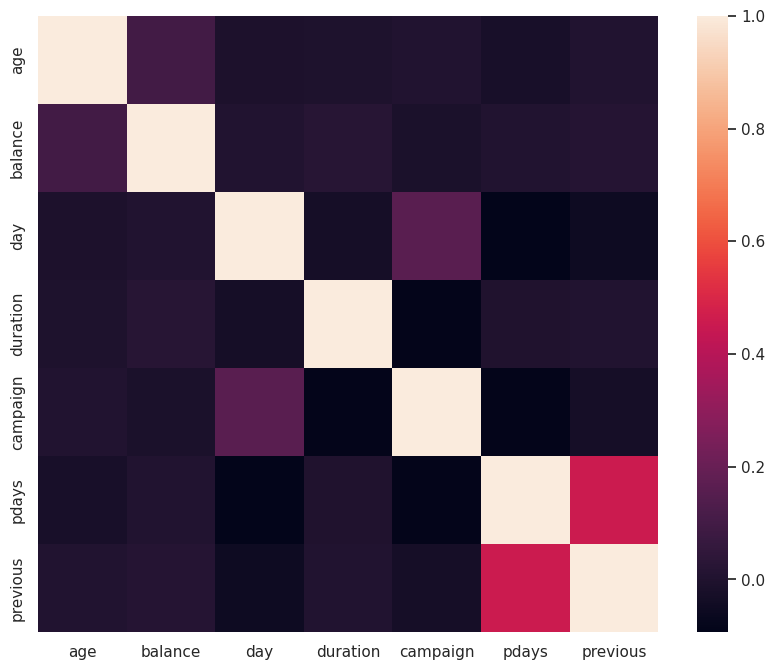

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(num_features.corr())

In [63]:
corr_metrics = num_features.corr(method='pearson')
corr_metrics.style.background_gradient()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


## Categorical Features Pre Processing

In [70]:
# Replace hyphens with _ and remove .
bank['job'] = bank['job'].str.replace('-','_').replace('\.','',regex=True)
bank['job'].value_counts()





,count
job,
blue_collar,9732
management,9458
technician,7597
admin,5171
services,4154
retired,2264
self_employed,1579
entrepreneur,1487
unemployed,1303


In [71]:
# Check previous outcome of the data
bank['poutcome'].value_counts()

,count
poutcome,
unknown,36959
failure,4901
other,1840
success,1511


## Load machine learning Tools

In [72]:
# Machine Learning Imports
#--------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Preprocessing
#--------------------------------
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


# Machine Learning Algorithms
#--------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import ExtraTreesClassifier


# Model Selection
#------------------------------------
from sklearn.model_selection import GridSearchCV


# Metrics
#-------------------------------
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

## Preprocess the data. We will impute all missing values with a constant, and one hot encode all categorical features

In [75]:
# Preprocess the data
# The next step is to preprocess the data. We will impute all missing values with a constant, and one hot encode all categorical features.

In [79]:
# If the correlation between two features is extremely high we will discard one of the features. We want to avoid multicollinearity
columns = np.full((corr_metrics.shape[0],), True, dtype=bool)
for i in range(corr_metrics.shape[0]):
    for j in range(i+1, corr_metrics.shape[0]):
        if corr_metrics.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False


numerical_selected_columns = corr_metrics.columns[columns]

In [80]:
numerical_selected_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [81]:
bank[numerical_selected_columns].corr(method='pearson').style.background_gradient()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [90]:
num_features = numerical_selected_columns.tolist()
num_features.remove('duration')

# the transformer replace NaN values with a specific placeholder.
# If constant, then replace missing values with fill_value

num_pipeline = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='constant')),
        ('std_scaler',StandardScaler())
    ]
)
# Categorical Features
cat_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']

cat_pipeline = Pipeline(steps = [
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("num",  num_pipeline, num_features),
    ("cat",  cat_pipeline, cat_features)
])


## Fit the model and evaluate performance


In [92]:
# Creaste the cleaned up dataset
features = num_features + cat_features
X = bank[features]
y = bank['y']

## Logisitic Regression

In [95]:
# Import train_test split functions

from sklearn.model_selection import train_test_split

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model',LogisticRegression(solver='liblinear'))])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)



0.8933982085591065

## The model is running with 89% accuracy
